<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/MultipleRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
"warnings.filterwarnings(\"ignore\")"


'warnings.filterwarnings("ignore")'

In [8]:
automobile_df = pd.read_csv("/content/sample_data/auto-mpg-processed.csv")

In [9]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


Training_score:  0.7165134139394257
Test_score:  0.6460478972647498


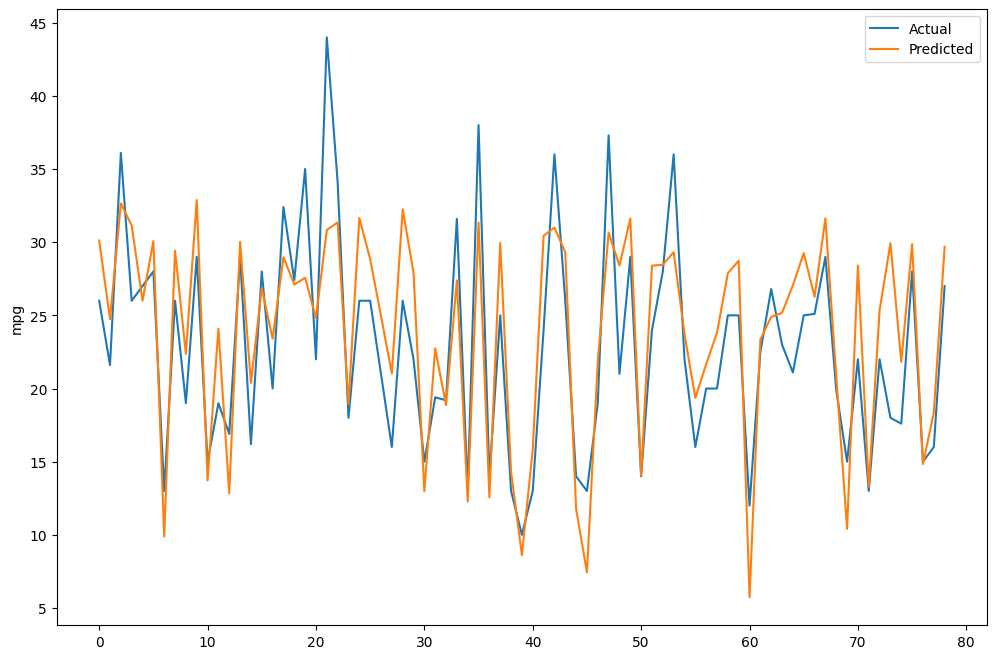

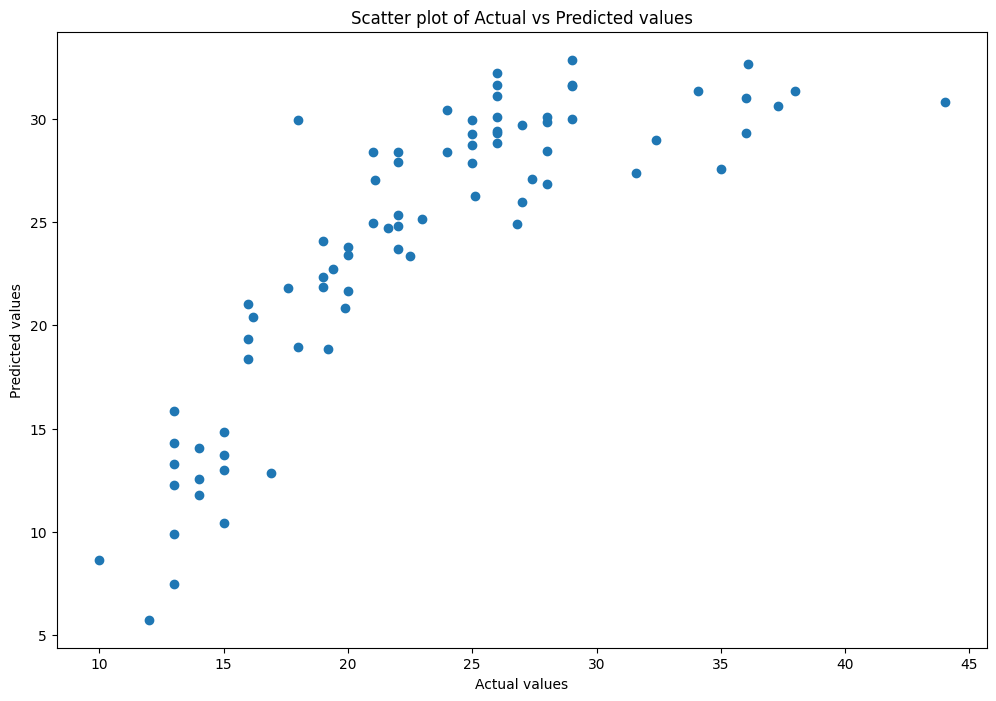

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def build_model(regression_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):

    # Extracting the independent variables (X) and dependent variable (Y)
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    # Applying preprocessing function if provided
    if preprocess_fn is not None:
        X = preprocess_fn(X)

    # Splitting the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac, random_state=42)

    # Fitting the regression model
    model = regression_fn()
    model.fit(x_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(x_test)

    # Printing training and test scores
    print("Training_score: ", model.score(x_train, y_train))
    print("Test_score: ", r2_score(y_test, y_pred))

    # Plotting actual vs predicted values if requested
    if show_plot_Y:
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.values, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()

    # Plotting scatter plot of actual vs predicted values if requested
    if show_plot_scatter:
        plt.figure(figsize=(12, 8))
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual values')
        plt.ylabel('Predicted values')
        plt.title('Scatter plot of Actual vs Predicted values')
        plt.show()

    return model

# Example usage:
from sklearn.linear_model import LinearRegression

# Load the dataset
automobile_df = pd.read_csv("/content/sample_data/auto-mpg-processed.csv")

# Build and evaluate the model
model = build_model(
    regression_fn=LinearRegression,
    name_of_y_col='mpg',
    names_of_x_cols=['displacement', 'horsepower', 'weight', 'acceleration'],
    dataset=automobile_df,
    show_plot_Y=True,
    show_plot_scatter=True
)


Training_score:  0.7165134139394257
Test_score:  0.6460478972647498


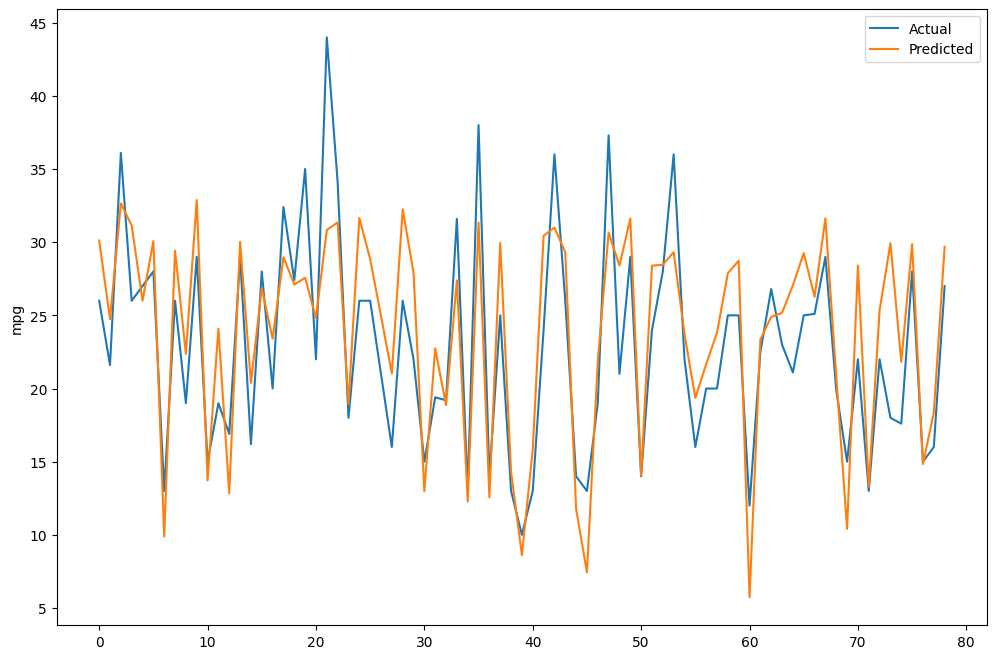

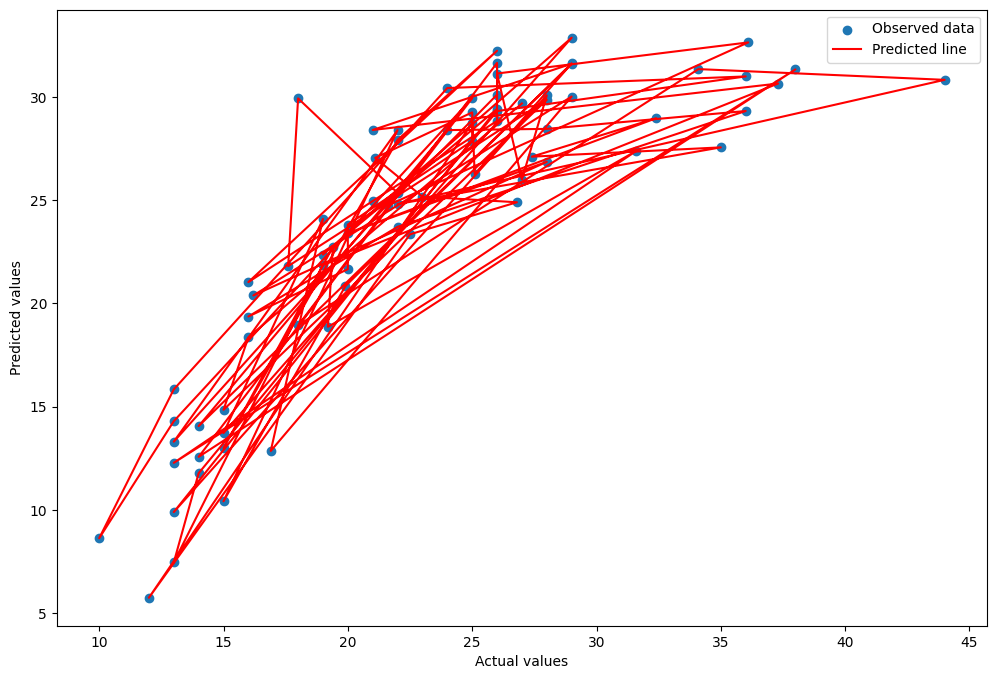

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the function to build the model
def build_model(regression_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):

    # Extracting the independent variables (X) and dependent variable (Y)
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    # Applying preprocessing function if provided
    if preprocess_fn is not None:
        X = preprocess_fn(X)

    # Splitting the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac, random_state=42)

    # Fitting the regression model

    model.fit(x_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(x_test)

    # Printing training and test scores
    print("Training_score: ", model.score(x_train, y_train))
    print("Test_score: ", r2_score(y_test, y_pred))

    # Plotting actual vs predicted values if requested
    if show_plot_Y:
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.values, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()

    # Plotting scatter plot of actual vs predicted values if requested
    if show_plot_scatter:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.scatter(y_test, y_pred, label='Observed data')
        ax.plot(y_test, y_pred, 'r', label='Predicted line')
        plt.xlabel('Actual values')
        plt.ylabel('Predicted values')
        plt.legend()
        plt.show()

    return {
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

# Function to compare results
def compare_results():
    for key in result_dict:
        print('Regression:', key)
        print('Training score:', result_dict[key]['training_score'])
        print('Test score:', result_dict[key]['test_score'])
        print()

# Define the linear regression function
def linear_reg(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

# Load the dataset
automobile_df = pd.read_csv("/content/sample_data/auto-mpg-processed.csv")

# Initialize result dictionary
result_dict = {}

# Build and evaluate the model
result_dict['Linear Regression'] = build_model(
    regression_fn=linear_reg,
    name_of_y_col='mpg',
    names_of_x_cols=['displacement', 'horsepower', 'weight', 'acceleration'],
    dataset=automobile_df,
    show_plot_Y=True,
    show_plot_scatter=True
)

# Compare the results
compare_results()


Training_score:  0.6981745885310532
Test_score:  0.6533466675646016


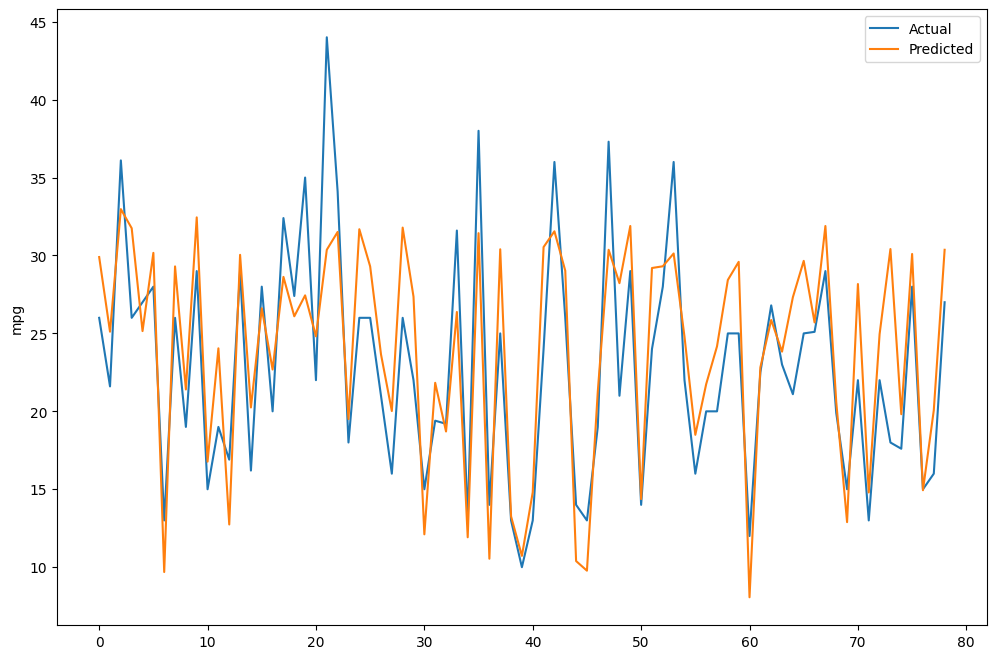

In [12]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                   'mpg',
                                                  ['weight'],
                                                 automobile_df,
                                                    show_plot_Y=True)


Training_score:  0.7166422136497115
Test_score:  0.648531211088908


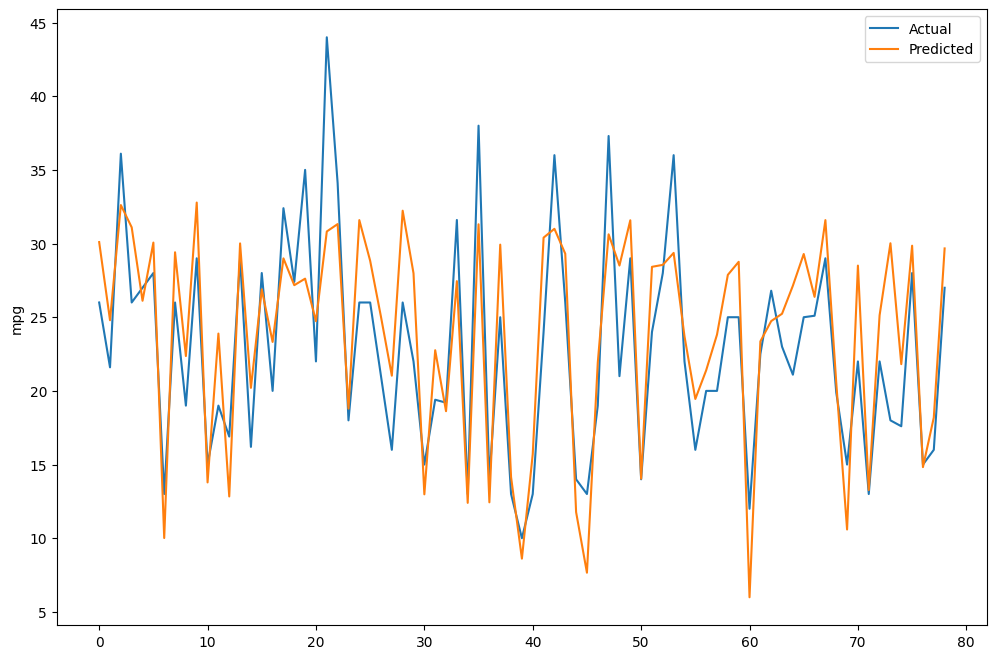

In [13]:

result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                          'mpg',
                                                         ['cylinders',
                                                         'displacement',
                                                         'horsepower',
                                                         'weight',
                                                         'acceleration'],
                                                         automobile_df,
                                                         show_plot_Y=True)




Training_score:  0.7149822041359516
Test_score:  0.6514190280854422


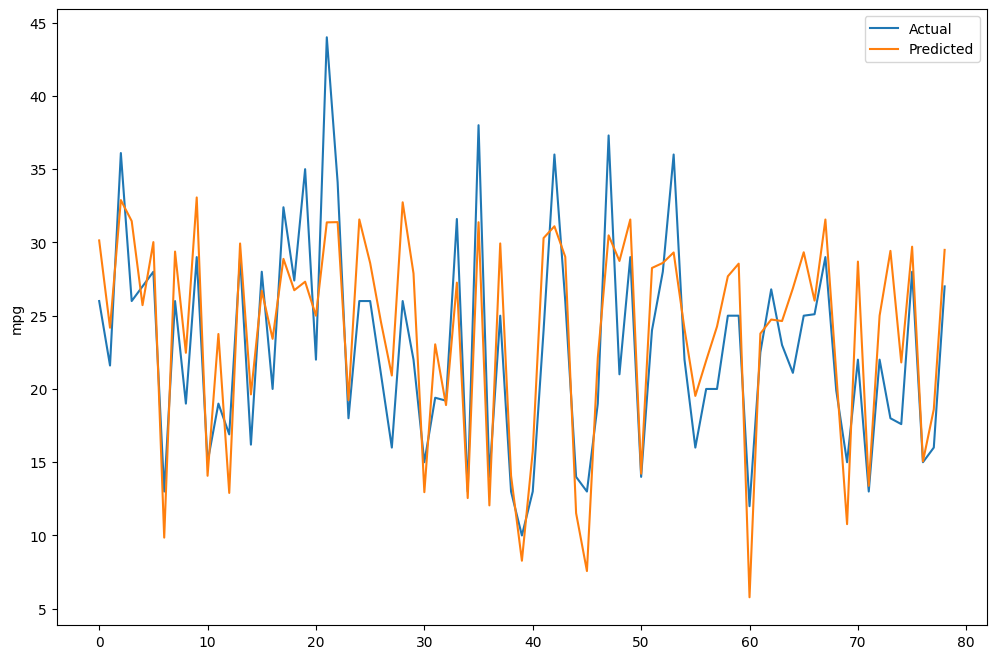

In [14]:

result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                          'mpg',
                                                       ['horsepower',
                                                        'weight'],
                                                         automobile_df,
                                                          show_plot_Y=True)

In [15]:
compare_results()

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498

Regression: mpg ~ single_linear
Training score: 0.6981745885310532
Test score: 0.6533466675646016

Regression: mpg ~ kitchen_sink_linear
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ parsimonius_linear
Training score: 0.7149822041359516
Test score: 0.6514190280854422



In [16]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)

    return model



Training_score:  0.6880379104409405
Test_score:  0.6090286330860131


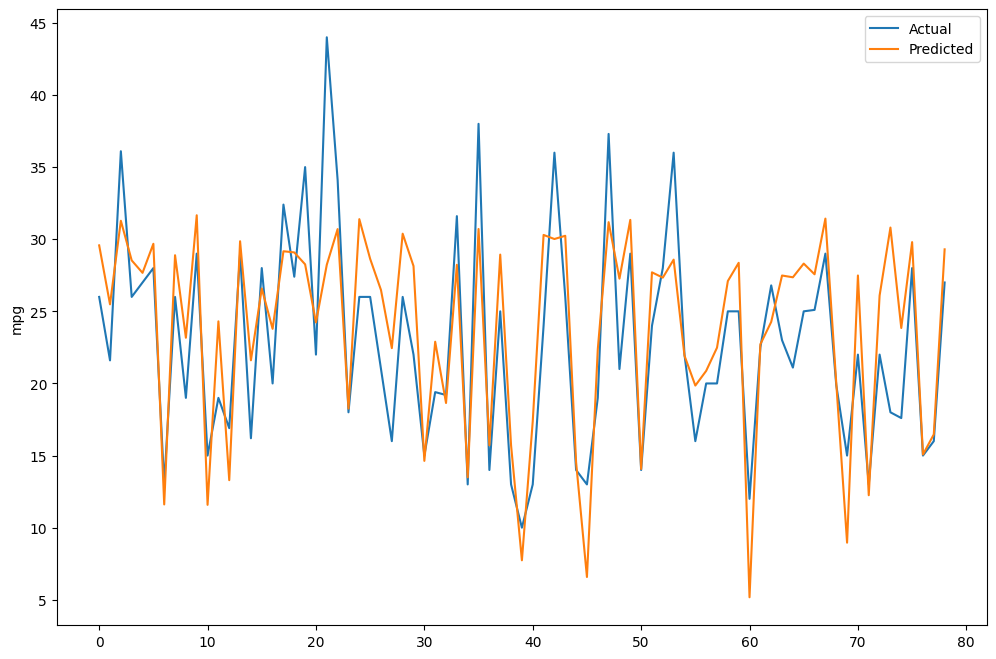

In [17]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                        'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower',
                                                 'acceleration'],
                                                         automobile_df,
                                                        show_plot_Y=True)



In [18]:
compare_results()

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498

Regression: mpg ~ single_linear
Training score: 0.6981745885310532
Test score: 0.6533466675646016

Regression: mpg ~ kitchen_sink_linear
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ parsimonius_linear
Training score: 0.7149822041359516
Test score: 0.6514190280854422

Regression: mpg ~ kitchen_sink_lasso
Training score: 0.6880379104409405
Test score: 0.6090286330860131



In [19]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
     model = Ridge(alpha=alpha, normalize=normalize)
     model.fit(x_train, y_train)

     return model


Training_score:  0.7166422136497115
Test_score:  0.648531211088908


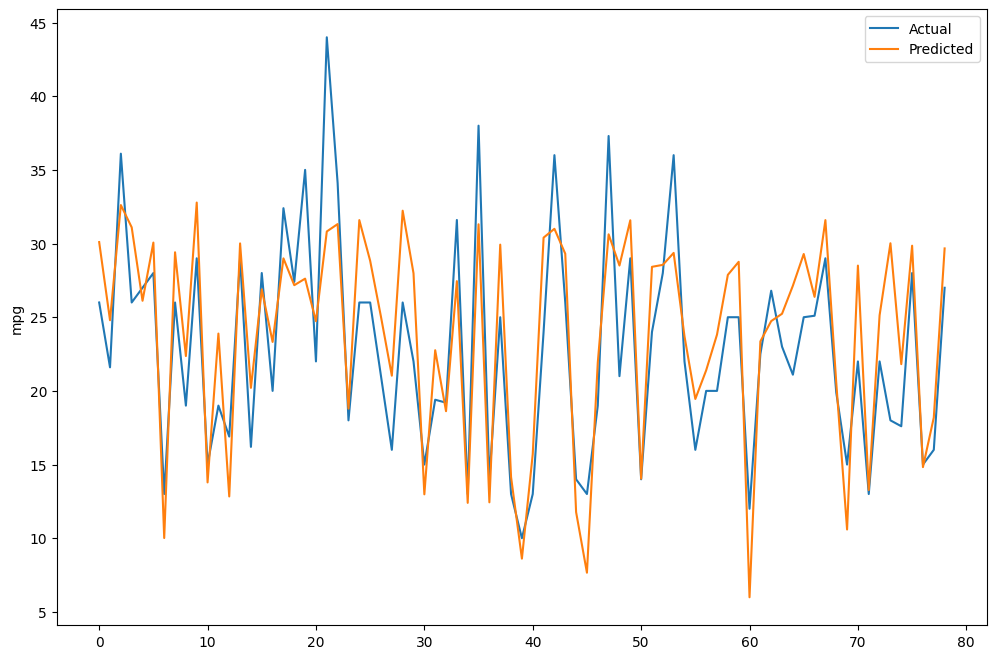

In [20]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                    'displacement',
                                                     'horsepower',
                                                     'weight',
                                                      'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)


In [21]:
compare_results()

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498

Regression: mpg ~ single_linear
Training score: 0.6981745885310532
Test score: 0.6533466675646016

Regression: mpg ~ kitchen_sink_linear
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ parsimonius_linear
Training score: 0.7149822041359516
Test score: 0.6514190280854422

Regression: mpg ~ kitchen_sink_lasso
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_ridge
Training score: 0.7166422136497115
Test score: 0.648531211088908



In [22]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5,
                  normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):
       print("Equivalent to:", equivalent_to)
       model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
       model.fit(x_train, y_train)

       return model



In [23]:
from functools import partial

Training_score:  0.7166422136497115
Test_score:  0.648531211088908


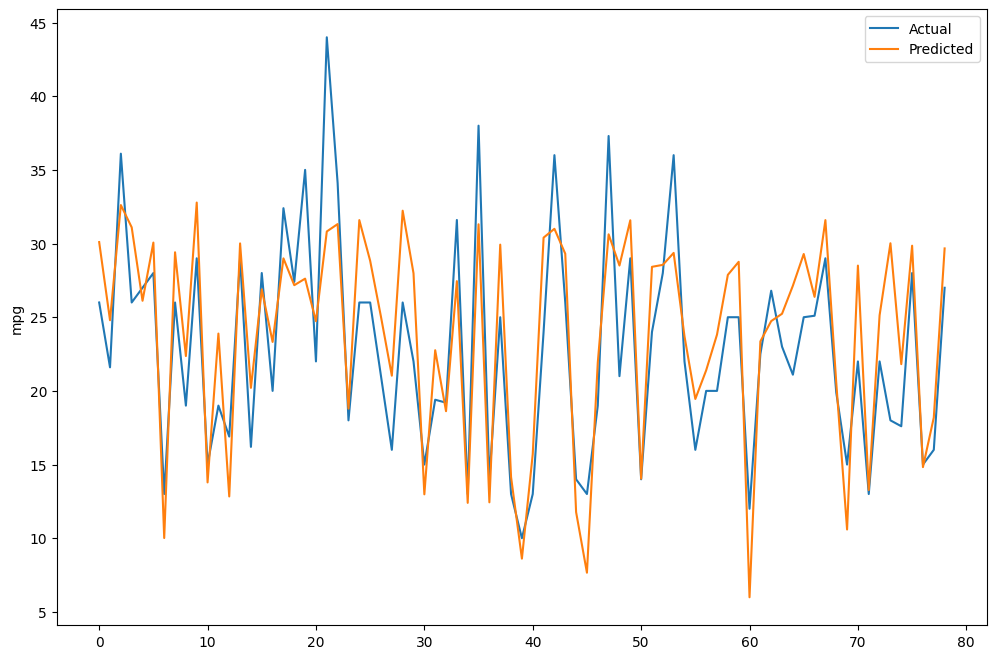

In [24]:
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg,
                                                                   alpha=0, equivalent_to="OLS"),
                                                                  'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                  automobile_df,
                                                                   show_plot_Y=True)



Training_score:  0.7166422136497115
Test_score:  0.648531211088908


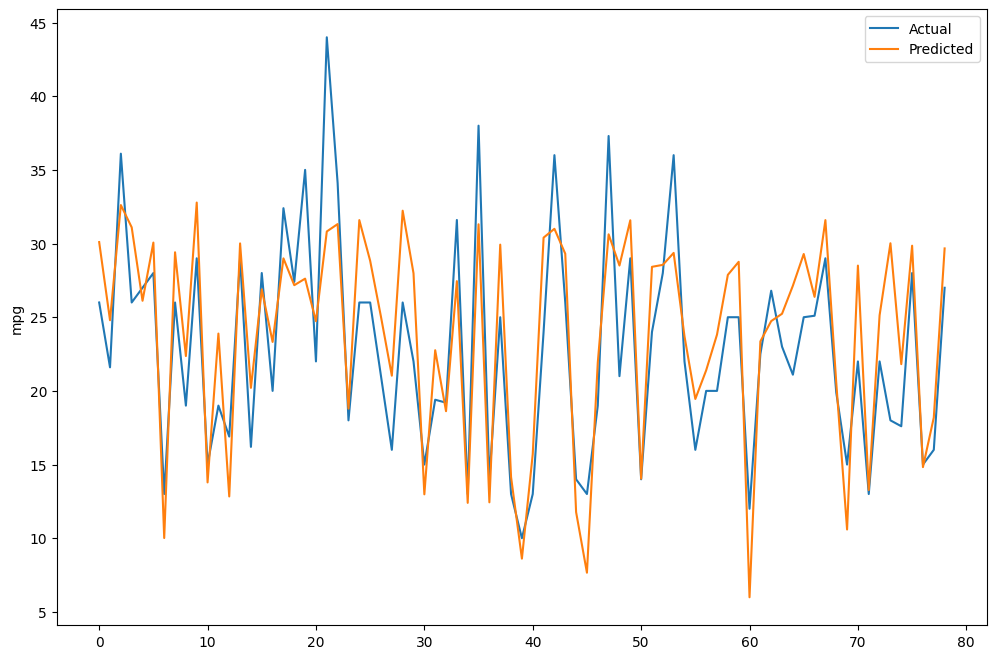

In [25]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio=0, equivalent_to="Lasso"),
                                                                      'mpg',
                                                                    ['cylinders',
                                                                     'displacement',
                                                                     'horsepower',
                                                                     'weight',
                                                                     'acceleration'],
                                                                     automobile_df,
                                                                      show_plot_Y=True)




Training_score:  0.6880379104409405
Test_score:  0.6090286330860131


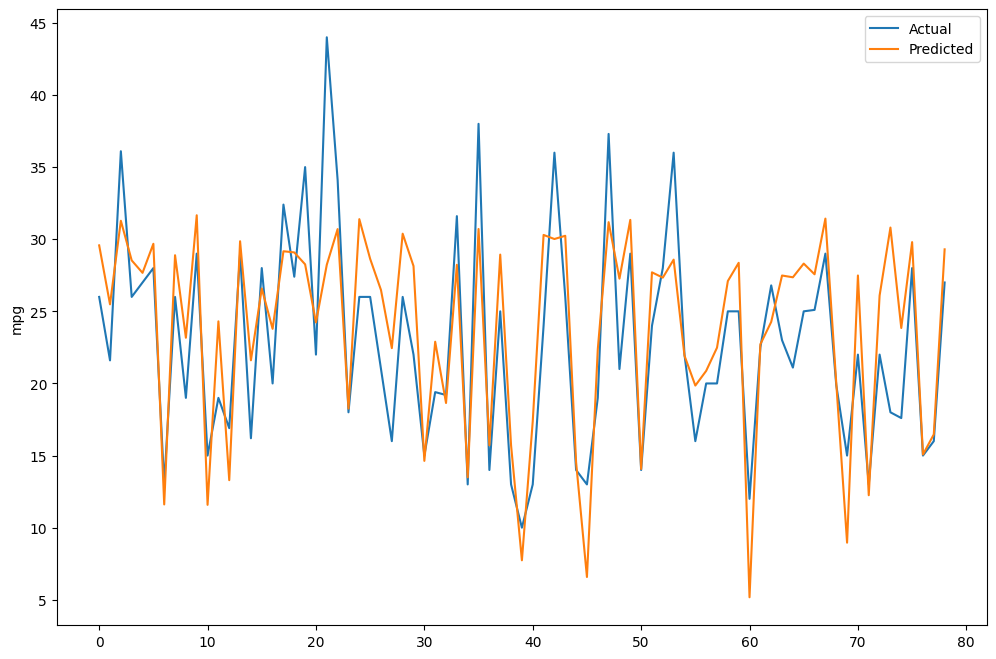

In [26]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio=1, equivalent_to="Ridge"),
                                                                    'mpg',
                                                                    ['cylinders',
                                                                     'displacement',
                                                                   'horsepower',
                                                                   'acceleration'],
                                                                     automobile_df,
                                                                      show_plot_Y=True)




Training_score:  0.7166422136497115
Test_score:  0.648531211088908


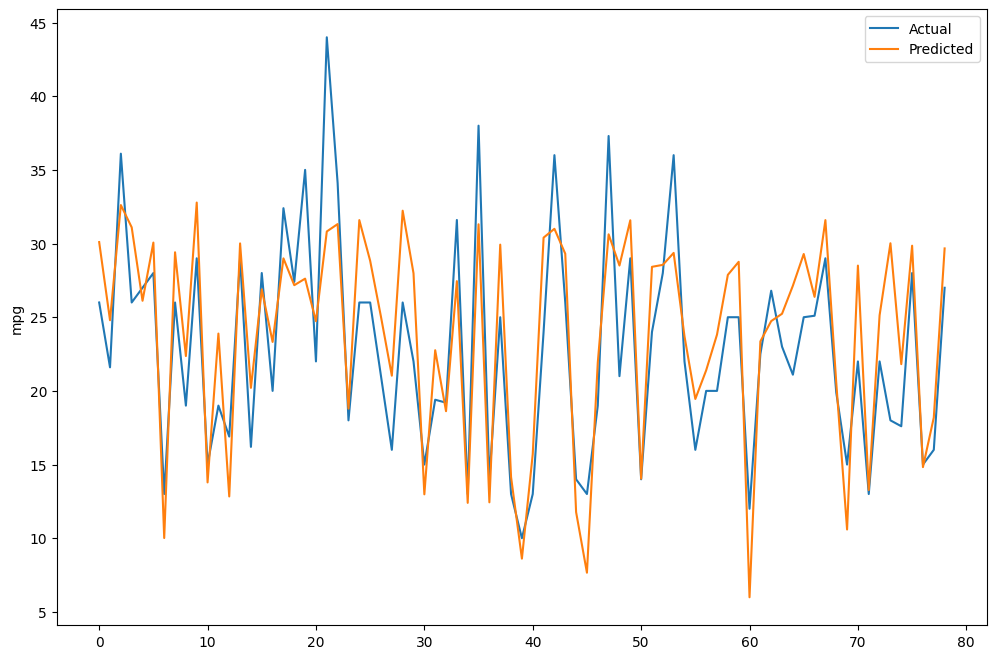

In [27]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                                'mpg',
                                                             [ 'cylinders',
                                                               'displacement',
                                                             'horsepower',
                                                               'weight',
                                                               'acceleration'],
                                                                automobile_df,
                                                               show_plot_Y=True)


In [28]:
compare_results()

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498

Regression: mpg ~ single_linear
Training score: 0.6981745885310532
Test score: 0.6533466675646016

Regression: mpg ~ kitchen_sink_linear
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ parsimonius_linear
Training score: 0.7149822041359516
Test score: 0.6514190280854422

Regression: mpg ~ kitchen_sink_lasso
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_ridge
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_ols
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_lasso
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_ridge
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_elastic_net
Tr

In [29]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
        model = SVR(kernel=kernel, epsilon=epsilon, C=C)
        model.fit(x_train,y_train)
        return model


Training_score:  0.7166422136497115
Test_score:  0.648531211088908


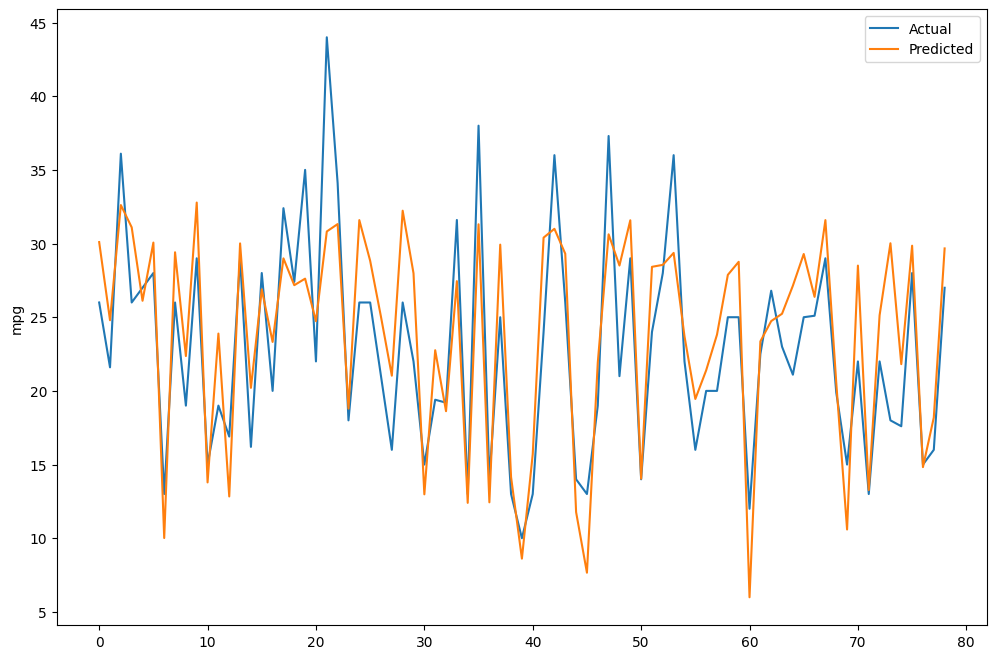

In [35]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                       'mpg',
                                                         ['cylinders',
                                                         'displacement',
                                                         'horsepower',
                                                         'weight',
                                                         'acceleration'],
                                                          automobile_df,
                                                          show_plot_Y=True)

In [36]:
compare_results()

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498

Regression: mpg ~ single_linear
Training score: 0.6981745885310532
Test score: 0.6533466675646016

Regression: mpg ~ kitchen_sink_linear
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ parsimonius_linear
Training score: 0.7149822041359516
Test score: 0.6514190280854422

Regression: mpg ~ kitchen_sink_lasso
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_ridge
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_ols
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_lasso
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_ridge
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_elastic_net
Tr

In [38]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
       model = KNeighborsRegressor(n_neighbors=n_neighbors)
       model.fit(x_train, y_train)

       return model

Training_score:  0.7166422136497115
Test_score:  0.648531211088908


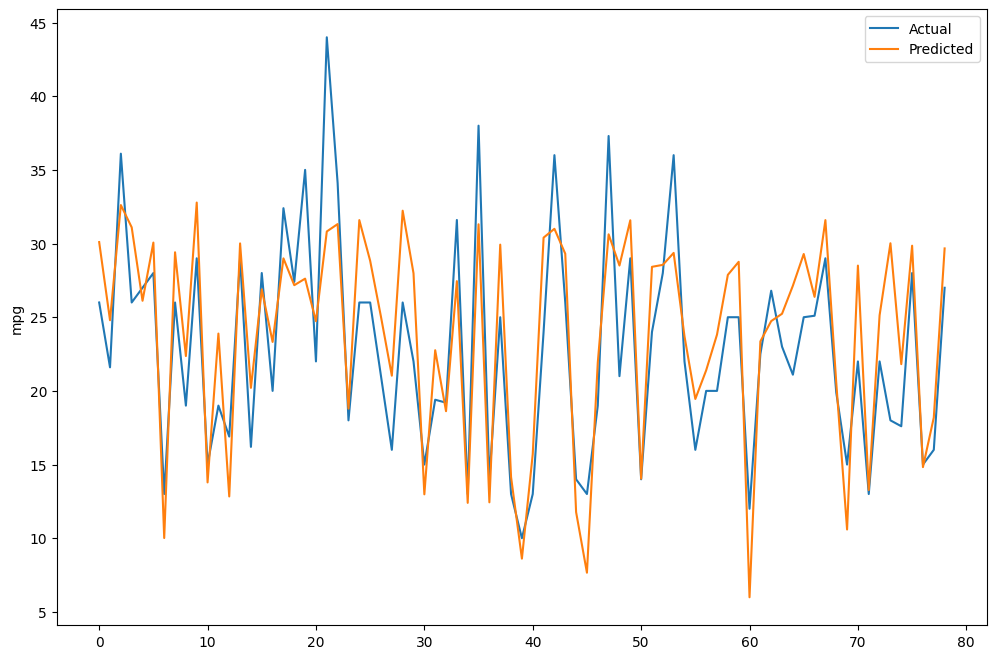

In [39]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                              'mpg',
                                                             ['cylinders',
                                                              'displacement',
                                                              'horsepower',
                                                              'weight',
                                                            'acceleration'],
                                                            automobile_df,
                                                              show_plot_Y=True)


In [40]:
compare_results()

Regression: Linear Regression
Training score: 0.7165134139394257
Test score: 0.6460478972647498

Regression: mpg ~ single_linear
Training score: 0.6981745885310532
Test score: 0.6533466675646016

Regression: mpg ~ kitchen_sink_linear
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ parsimonius_linear
Training score: 0.7149822041359516
Test score: 0.6514190280854422

Regression: mpg ~ kitchen_sink_lasso
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_ridge
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_ols
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_lasso
Training score: 0.7166422136497115
Test score: 0.648531211088908

Regression: mpg ~ kitchen_sink_elastic_net_ridge
Training score: 0.6880379104409405
Test score: 0.6090286330860131

Regression: mpg ~ kitchen_sink_elastic_net
Tr

In [41]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)

    return scaler.transform(x)

In [42]:
def sgd_reg(x_train,y_train,max_iter=10000, tol=1e-3):
  model =SGDRegressor(max_iter=max_iter,tol=tol)
  model.fit(x_train,y_train)
  return model

Training_score:  0.7166422136497115
Test_score:  0.6485312110889081


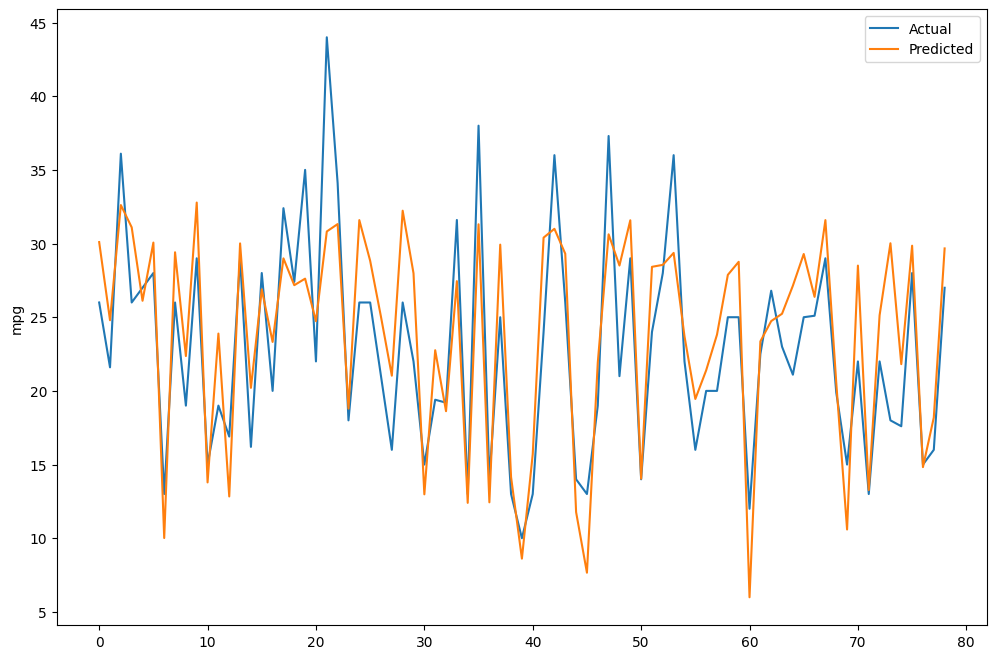

In [44]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                      'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                        automobile_df,
                                                        show_plot_Y=True,
                                                        preprocess_fn=apply_standard_scaler)



In [47]:
def decision_tree_reg(x_train, y_train, max_depth=2):
          model = DecisionTreeRegressor(max_depth=max_depth)
          model.fit(x_train, y_train)
          return model


Training_score:  0.7166422136497115
Test_score:  0.648531211088908


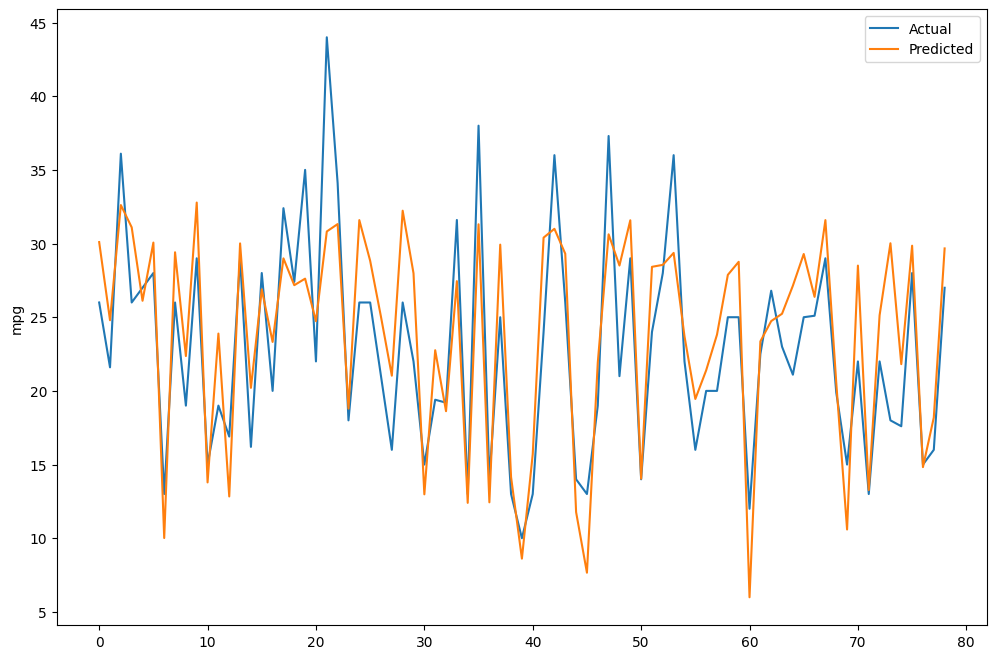

In [48]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                                 'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)
